<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/%E9%9B%BB%E7%A3%81%E5%AD%B8/%E7%90%83%E9%AB%94%E5%B8%B6%E9%9B%BB%E9%AB%94%E7%9A%84%E9%9B%BB%E5%A0%B4%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

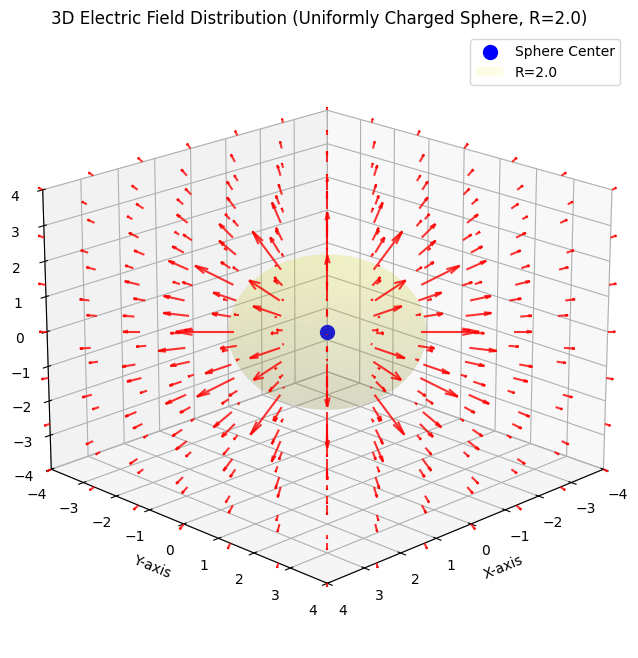

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. 定義常數與公式 ---
K = 5.0       # 簡化值 (增大 K 讓箭頭更長，更容易觀察)
R = 2.0       # 球體半徑 (R)，與座標軸範圍匹配
L = 4.0       # 空間範圍 (-L 到 +L)，比 R 大一倍

def E_field_sphere_3D(x, y, z, K, R):
    """計算點 (x, y, z) 處的電場向量 (Ex, Ey, Ez)"""
    r_sq = x**2 + y**2 + z**2
    r = np.sqrt(r_sq)

    # 避免 r 趨近 0 時的計算問題
    if r < 0.1: # 設置一個小的安全半徑
        r = 0.1

    # 判斷內部或外部
    if r < R:
        # 內部電場 (E_in ∝ r)
        E_mag = (K / R**3) * r
    else:
        # 外部電場 (E_out ∝ 1/r^2)
        E_mag = K / r_sq

    # E 的 x, y, z 分量
    Ex = E_mag * (x / r)
    Ey = E_mag * (y / r)
    Ez = E_mag * (z / r)
    return Ex, Ey, Ez

# --- 2. 設定 3D 網格點 (Quiver Plot) ---
N = 7     # 每軸的取樣點數

X_grid = np.linspace(-L, L, N)
Y_grid = np.linspace(-L, L, N)
Z_grid = np.linspace(-L, L, N)

# 創建 3D 網格
X, Y, Z = np.meshgrid(X_grid, Y_grid, Z_grid)


# --- 3. 計算每個網格點上的電場向量 ---
# 將 3D 網格展平以便於計算
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# 對每個點計算電場向量
U, V, W = np.zeros_like(X_flat), np.zeros_like(Y_flat), np.zeros_like(Z_flat)
for i in range(len(X_flat)):
    U[i], V[i], W[i] = E_field_sphere_3D(X_flat[i], Y_flat[i], Z_flat[i], K, R)
# -------------------------------------------------------------


# --- 4. 繪製 3D 向量場 ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 繪製箭頭，不正規化 (normalize=False) 以顯示長度變化
ax.quiver(X_flat, Y_flat, Z_flat, U, V, W, length=1.0, normalize=False, color='red', alpha=0.8)

# 標記球體中心
ax.scatter(0, 0, 0, color='blue', s=100, label='Sphere Center')

# 提示球體邊界 R
# 繪製一個代表球體的透明圓框
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = R * np.outer(np.cos(u), np.sin(v))
y_sphere = R * np.outer(np.sin(u), np.sin(v))
z_sphere = R * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='yellow', alpha=0.1, linewidth=0, label=f'R={R}')

# 設定圖表細節
ax.set_title(f'3D Electric Field Distribution (Uniformly Charged Sphere, R={R})')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_xlim([-L, L])
ax.set_ylim([-L, L])
ax.set_zlim([-L, L])
ax.view_init(elev=20, azim=45)

plt.legend()
plt.show()